In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/data science/data sets/homeprice2.csv')
df

,area,bedrooms,age,price
0,2000,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
import math
bad = math.floor(df.bedrooms.median())
bad

3

In [4]:
df.bedrooms = df.bedrooms.fillna(bad)

In [5]:
df

,area,bedrooms,age,price
0,2000,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
regressor = linear_model.LinearRegression()

In [7]:
regressor.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
regressor.coef_

array([   72.19170404,  6410.31390135, -4523.5426009 ])

In [9]:
regressor.intercept_

447125.5605380708

In [10]:
regressor.predict([[3000,3,40]])

array([501989.9103139])

In [11]:
regressor.predict([[2500,4,5]])

array([630628.36322869])

In [12]:
df = pd.read_csv('C:/Users/User/Desktop/data science/data sets/homeprice3.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [13]:
dumnies = pd.get_dummies(df.town)
dumnies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [14]:
merge = pd.concat([df,dumnies],axis=1)

In [15]:
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [16]:
final = merge.drop(['town','west windsor'],axis=1)
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [18]:
x = final.drop('price',axis=1)

In [19]:
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [20]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [21]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [23]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [24]:
model.score(x,y)

0.9573929037221873

In [25]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
dfile = df
dfile.town = le.fit_transform(dfile.town)
dfile

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [28]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [29]:
x = df[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [30]:
y = df.price

In [31]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [33]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [36]:
x = one.fit_transform(x).toarray()
x

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [94]:
df = pd.read_excel('C:/Users/User/Desktop/data science/data sets/carprice.xlxs')
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/User/Desktop/data science/data sets/carprice.xlxs'

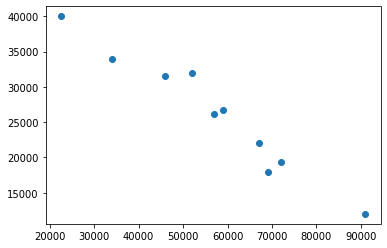

In [42]:
plt.scatter(df.Mileage,df['Sell Price($)'])

In [43]:
x = df[['Mileage','Age(yrs)']]
y = df[['Sell Price($)']]

In [44]:
x

,Mileage,Age(yrs)
0,69000,6
1,34000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [45]:
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [66]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  #0.8 per train data

In [72]:
len(x_train) # total 10 value x_train data length 8 and x_test data length is 2 

8

In [73]:
len(x_test)

2

In [74]:
x_train

,Mileage,Age(yrs)
4,46000,4
2,57000,5
9,67000,6
7,72000,6
0,69000,6
1,34000,3
6,52000,5
3,22500,2


In [76]:
x_test

,Mileage,Age(yrs)
8,91000,8
5,59000,5


In [77]:
len(y_train)

8

In [78]:
len(y_test)

2

In [79]:
y_train

,Sell Price($)
4,31500
2,26100
9,22000
7,19300
0,18000
1,34000
6,32000
3,40000


In [80]:
y_test

,Sell Price($)
8,12000
5,26750


In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
reg.predict(x_test)   #mileage and age  atli hovi joei

array([[12084.54236611],
       [23858.15347722]])

In [90]:
y_test  #something j 6e pprice 

,Sell Price($)
8,12000
5,26750


In [91]:
reg.score(x_test,y_test)  #92 persantest accrucy x_test and y_test pprice compare

0.9230572941293461